# Image coding fundamentals

### Motivation

In [ ]:
!wget http://www.hpca.ual.es/~vruiz/images/Homer.png

![Homer-j2c.png](./Homer-j2c.png)

In [ ]:
!echo `wc -c < Homer.png` bytes

In [ ]:
!convert -quality 40 Homer.png Homer.jp2
# Note: in OSX, install imagemagick with: "brew install imagemagick --with-openjpeg"

![Homer.jp2](./Homer.png)

In [ ]:
!echo `wc -c < Homer.jp2` bytes

In [ ]:
from PIL import Image, ImageChops, ImageOps
orig = Image.open('Homer.png')
comp = Image.open('Homer.jp2')
diff = ImageChops.subtract(orig, comp)
diff = ImageOps.equalize(diff)
diff.save('diff.png')

![diff.png](./diff.png)

## Spatial redundancy

Image compressors exploit *spatial redundancy* to achieve better bit-rate/distortion ratios.

In [ ]:
%cd 00-fundamentals/
!wget http://www.hpca.ual.es/~vruiz/images/lena.png
!convert lena.png lena.ppm
!pnmcut -top 250 -right 350 -width 40 -height 40 < lena.ppm | pnmtopng > lena-cut.png
!fig2dev -L png correlacion_lena.fig > correlacion_lena.png
%cd ..

![correlacion_lena.png](./00-fundamentals/correlacion_lena.png)

Spatial redundancy generates that neighbor pixels have similar colors.

## Spectral (color) redundancy

$\text{RGB}$ domain is more redundant than the $\text{Y'CbCr}$ domain:

\begin{equation}
    \left(
      \begin{array}{c}
        \text{Y'}\\
        \text{Cb}\\
        \text{Cr}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          0,299 & 0,587 & 0,144\\
          -0,1687 & -0,3313 & 0,5\\
          0,5 & -0,4187 & -0,0813
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right)
\end{equation}

(Integer version)

\begin{equation}
    \left(
      \begin{array}{c}
        256\times\text{Y'}\\
        256\times(\text{Cb}-128)\\
        256\times(\text{Cr}-128)
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          77 & 150 & 29\\
          -44 & -67 & 131\\
          131 & -110 & -21
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right)
  \end{equation}

Used, for example, in [JPEG](https://en.wikipedia.org/wiki/JPEG).

In [ ]:
!wget http://www.hpca.ual.es/~vruiz/images/san-diego.png

![san-diego.png](./san-diego.png)

In [1]:
from scipy import misc

In [2]:
RGB = misc.imread('san-diego.png')

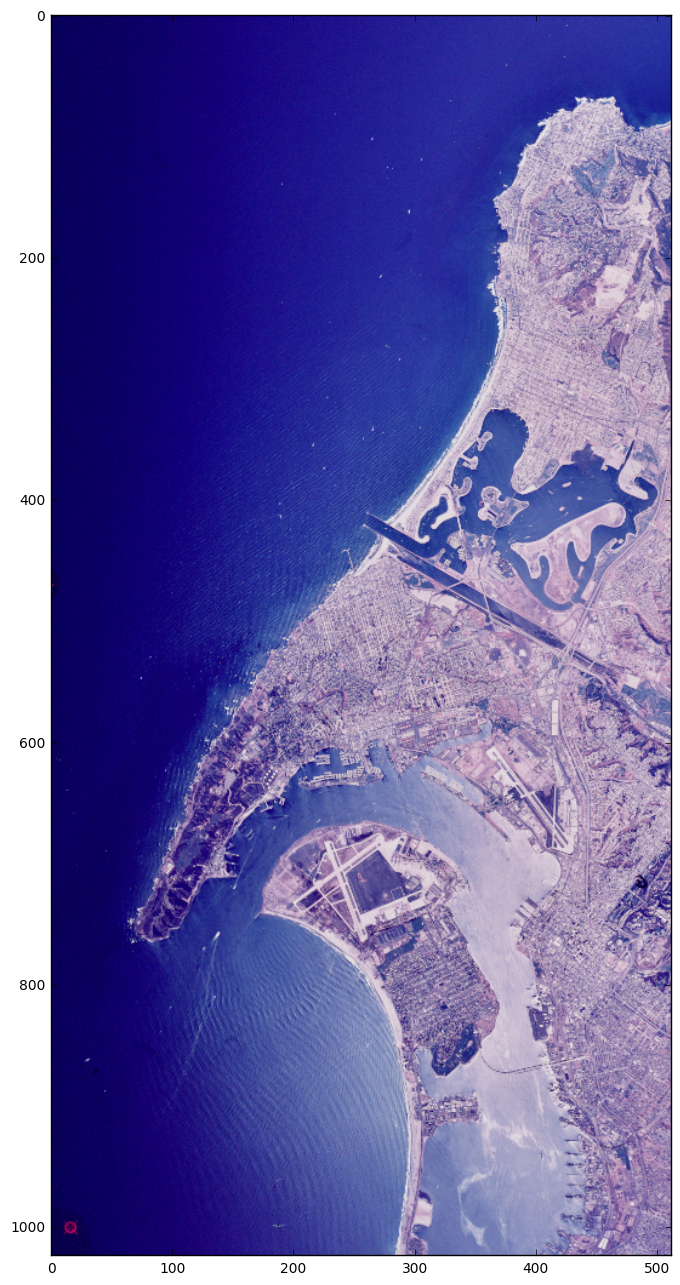

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,16))
plt.imshow(RGB)
plt.show()

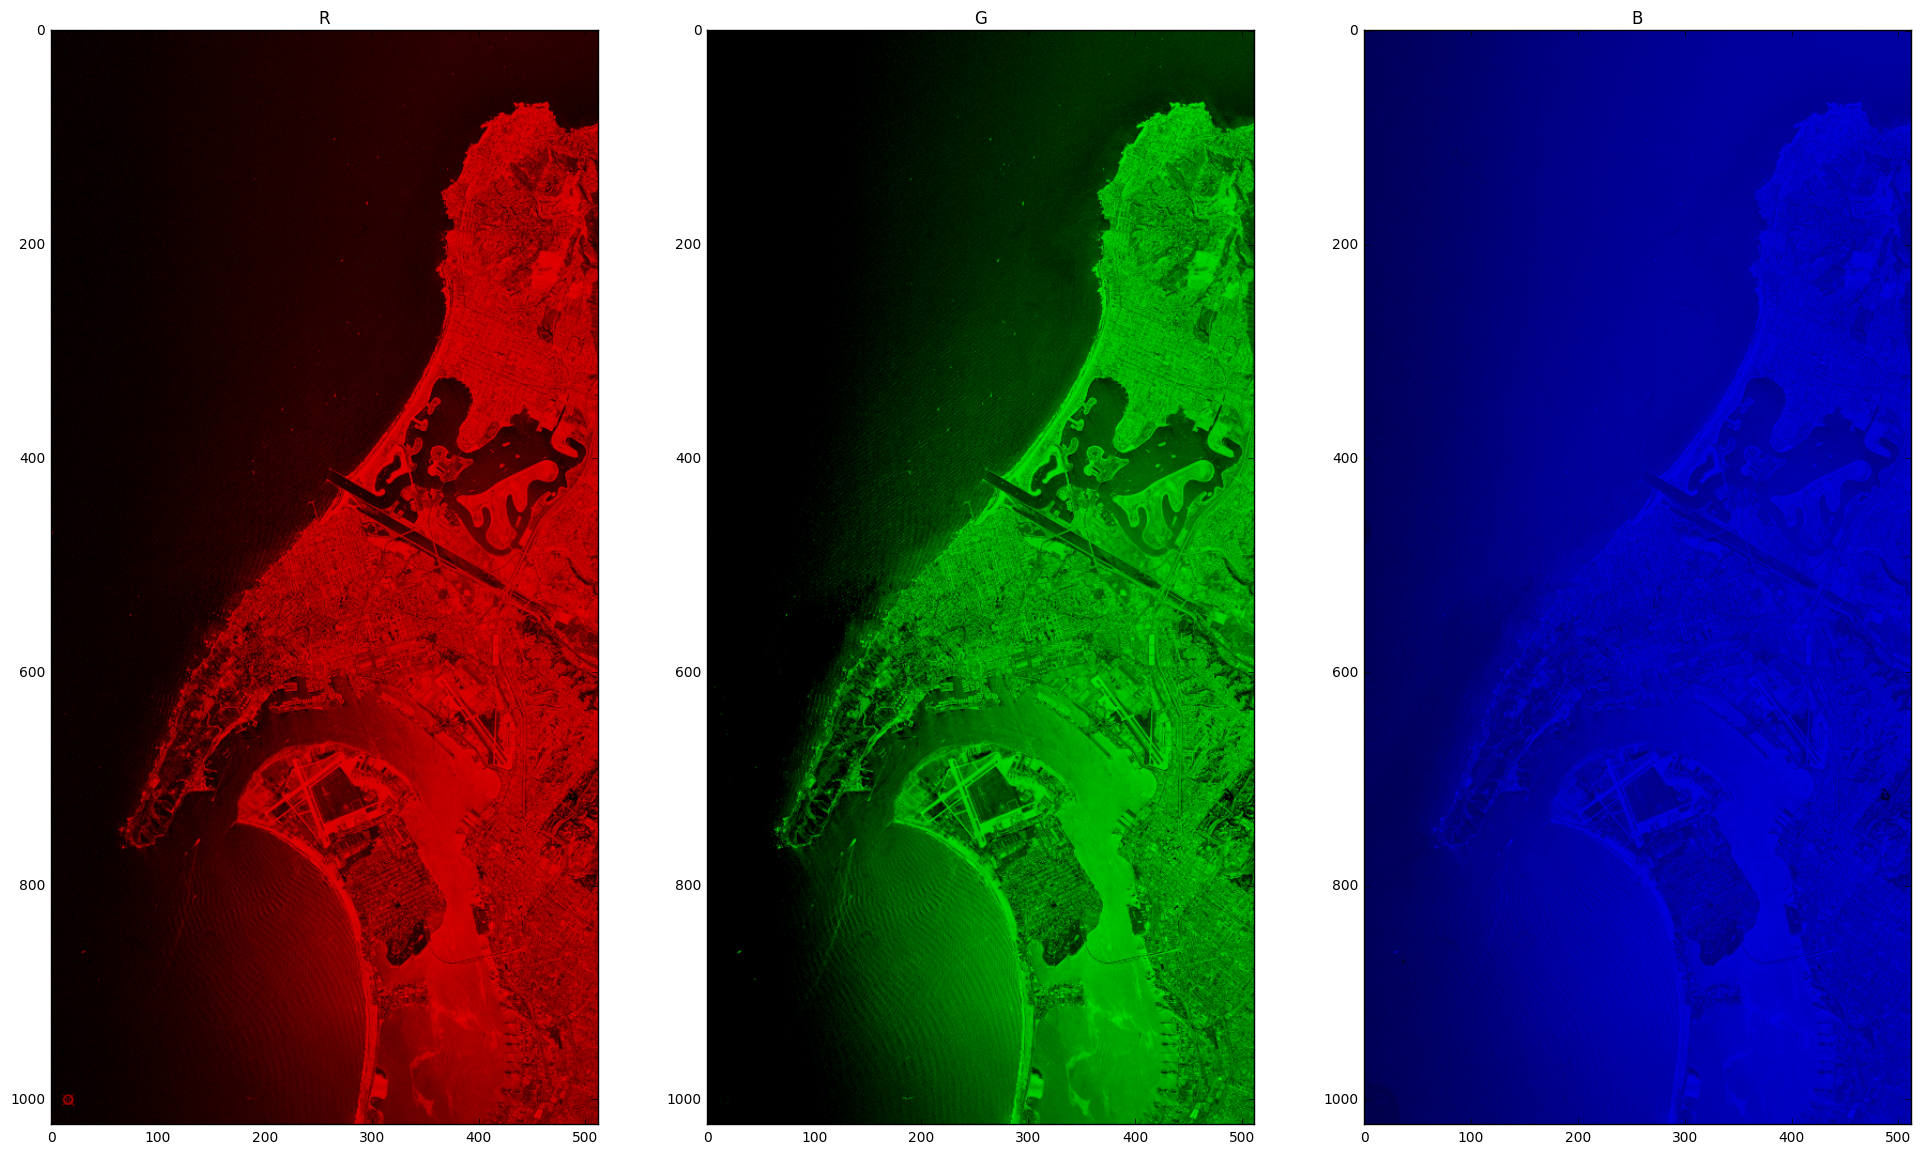

In [4]:
R = RGB.copy()
R[:,:,1] = 0
R[:,:,2] = 0
G = RGB.copy()
G[:,:,0] = 0
G[:,:,2] = 0
B = RGB.copy()
B[:,:,0] = 0
B[:,:,1] = 0

fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1)
a.set_title("R")
imgplot = plt.imshow(R)

a = fig.add_subplot(1,3,2)
a.set_title("G")
imgplot = plt.imshow(G)

a = fig.add_subplot(1,3,3)
a.set_title("B")
imgplot = plt.imshow(B)
plt.show()


#imgplot.axes.get_xaxis().set_visible(False)
#imgplot.axes.get_yaxis().set_visible(False)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off') # labels along the bottom edge are off
#fig_size = plt.rcParams["figure.figsize"]
#print(fig_size)

#fig_size[0] = 12
#fig_size[1] = 8
#print(fig_size)
#plt.rcParams["figure.figsize"] = fig_size

#plt.show()
# See https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111